In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
manifest = {}
with open("manifest.txt","r") as mn:
    lines = mn.read().split('\n')
    for l in lines:
        lfile = l.split()
        if len(lfile)>0:
            manifest[lfile[0]] = lfile[1]

In [5]:
names = sorted(manifest.keys())
ix = 0
for n in names:
    print ix,n
    ix+=1

0 andesitefine
1 andesitesolid
2 basaltsolid
3 brownsand
4 clearice
5 coarsesnow
6 dunesand
7 finesnow
8 frost
9 mediumsnow
10 seafoam
11 seawater
12 tapwater
13 yellowloam
14 yellowsand


In [6]:
nidx = 8
filename = manifest[names[nidx]]

In [7]:
with open(filename,"r") as fileobj:
    text = fileobj.read().split('\n')
    for k in range(len(text)):
        if text[k].split()[0]=="Additional":
            nhead = k+2
            break
print "Header has %d lines"%nhead

Header has 21 lines


In [8]:
spec = np.loadtxt(filename,skiprows=nhead,ndmin=2).transpose()

In [9]:
print spec.shape

(2, 965)


In [10]:
if spec[0,0] > spec[0,-1]:
    spec = np.flip(spec,axis=1)

Text(0.5,1,'water.frost.none.fine.all.frost_snw_.jhu.becknic.spectrum.txt')

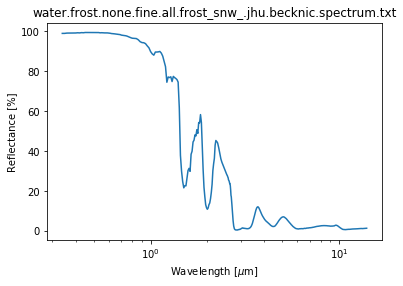

In [11]:
plt.plot(spec[0,:],spec[1,:])
plt.xscale('log')
plt.xlabel("Wavelength [$\mu$m]")
plt.ylabel("Reflectance [%]")
plt.title(filename)

In [12]:
specvar = names[nidx]
spectext = "       real :: %s(%d) = (/"%(specvar,spec.shape[1])
spectext += ",".join(spec[1,:8].astype(str)) + ", &\n"
wvtext = "       real :: %s(%d) = (/"%("wv"+specvar,spec.shape[1])
wvtext += ",".join(spec[0,:8].astype(str)) + ", &\n"
n=8
while n+8<spec.shape[1]:
    spectext += "      &          " + ",".join(["%.4f" % number for number in spec[1,n:n+8]]) + ", &\n"
    wvtext += "      &          " + ",".join(["%.4f" % number for number in spec[0,n:n+8]]) + ", &\n"
    n+=8
spectext += "      &          " + ",".join(spec[1,n:].astype(str)) + " /)"
wvtext += "      &          " + ",".join(spec[0,n:].astype(str)) + " /)"

In [13]:
print wvtext

       real :: wvfrost(965) = (/0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41, &
      &          0.4200,0.4300,0.4400,0.4500,0.4600,0.4700,0.4800,0.4900, &
      &          0.5000,0.5100,0.5200,0.5300,0.5400,0.5500,0.5600,0.5700, &
      &          0.5800,0.5900,0.6000,0.6100,0.6200,0.6300,0.6400,0.6500, &
      &          0.6600,0.6700,0.6800,0.6900,0.7000,0.7100,0.7200,0.7300, &
      &          0.7400,0.7500,0.7600,0.7700,0.7800,0.7900,0.8000,0.8200, &
      &          0.8400,0.8600,0.8800,0.9000,0.9200,0.9400,0.9600,0.9800, &
      &          1.0000,1.0200,1.0400,1.0600,1.0800,1.1000,1.1200,1.1400, &
      &          1.1600,1.1800,1.2000,1.2200,1.2400,1.2600,1.2800,1.3000, &
      &          1.3200,1.3400,1.3600,1.3800,1.4000,1.4200,1.4400,1.4600, &
      &          1.4800,1.5000,1.5200,1.5400,1.5600,1.5800,1.6000,1.6200, &
      &          1.6400,1.6600,1.6800,1.7000,1.7200,1.7400,1.7600,1.7800, &
      &          1.8000,1.8200,1.8400,1.8600,1.8800,1.9000,1.9200,1.9400, &
      &       

In [14]:
print spectext

       real :: frost(965) = (/99.038,99.048,99.192,99.208,99.25,99.252,99.244,99.35, &
      &          99.2840,99.4180,99.3640,99.4920,99.4820,99.5160,99.4840,99.4460, &
      &          99.4480,99.4460,99.3940,99.4560,99.3280,99.3800,99.3280,99.2860, &
      &          99.3100,99.2800,99.1980,99.1100,98.9640,98.9180,98.8400,98.7560, &
      &          98.6280,98.5680,98.5040,98.4200,98.1760,98.0980,98.0380,97.9380, &
      &          97.8360,97.6660,97.4320,97.1960,96.9900,96.7760,96.6170,96.5300, &
      &          96.4500,95.8500,94.8800,94.4300,94.3500,93.8900,92.7700,91.8000, &
      &          89.9100,88.7500,88.1200,89.6800,89.6800,89.7700,89.9700,89.1300, &
      &          87.6100,85.0000,82.3500,74.5200,77.1700,76.8600,77.2700,74.8700, &
      &          77.4700,76.8800,76.4300,75.8600,74.5900,61.7500,37.8400,29.8200, &
      &          24.6900,21.5400,22.6300,22.5200,26.4100,30.2400,31.3000,29.8100, &
      &          38.3700,39.9100,44.5500,45.4400,48.1000,47.6000,50.6900,

In [15]:
newfilename = filename[:-4] + "_f90.txt"
with open(newfilename,"w") as fileobj:
    fileobj.write(wvtext+'\n\n\n'+spectext+'\n')

In [16]:
wvref = np.loadtxt("wvref.txt")

In [17]:
print wvref.shape

(965,)


In [18]:
specinterp = np.interp(wvref,spec[0,:],spec[1,:])

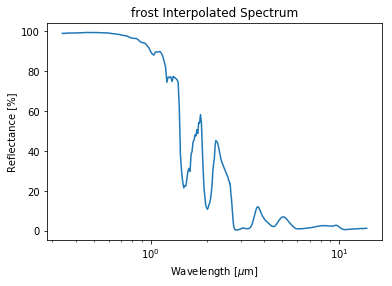

In [19]:
plt.plot(wvref,specinterp)
plt.xscale('log')
plt.ylabel("Reflectance [%]")
plt.xlabel("Wavelength [$\mu$m]")
plt.title(specvar+" Interpolated Spectrum")
plt.savefig(specvar+"_spec.png",bbox_inches='tight')

In [20]:
names = sorted(manifest.keys())
ix = 0
for n in names:
    print ix,n+".npy"
    filename = manifest[n]
    spec = np.loadtxt(filename,skiprows=nhead,ndmin=2).transpose()
    if spec[0,0]>spec[0,-1]:
        spec = np.flip(spec,axis=1)
    specinterp = np.interp(wvref,spec[0,:],spec[1,:])
    np.save(n+".npy",specinterp)
    ix+=1

0 andesitefine.npy
1 andesitesolid.npy
2 basaltsolid.npy
3 brownsand.npy
4 clearice.npy
5 coarsesnow.npy
6 dunesand.npy
7 finesnow.npy
8 frost.npy
9 mediumsnow.npy
10 seafoam.npy
11 seawater.npy
12 tapwater.npy
13 yellowloam.npy
14 yellowsand.npy


In [85]:
def bbtemp(teff,wvref):
    sbk = 5.67e-8
    const = 0.0143877735383
    bbf = 1.0/wvref**5 * (1.0/(np.exp(const/(teff*wvref*1e-6))-1))
    return bbf

In [86]:
alb1 = np.zeros(100)
alb2 = np.zeros(100)
albb = np.zeros(100)
teffs = np.linspace(2700,6000,num=100)

In [87]:
wvref[144]

2.5

In [88]:
for n in range(100):
    bbf = bbtemp(teffs[n],wvref)
    refl = specinterp*0.01*bbf
    alb1[n] = np.trapz(refl[:42],x=wvref[:42])/np.trapz(bbf[:42],x=wvref[:42])
    alb2[n] = np.trapz(refl[42:145],x=wvref[42:145])/np.trapz(bbf[42:145],x=wvref[42:145])
    albb[n] = np.trapz(refl[:145],x=wvref[:145])/np.trapz(bbf[:145],x=wvref[:145])

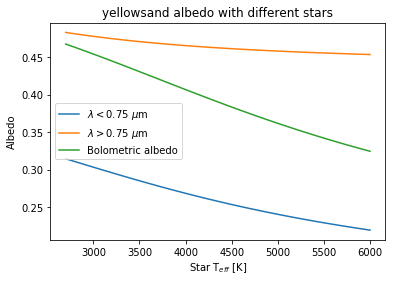

In [89]:
plt.plot(teffs,alb1,label="$\lambda<{0.75}$ $\mu$m")
plt.plot(teffs,alb2,label="$\lambda>{0.75}$ $\mu$m")
plt.plot(teffs,albb,label='Bolometric albedo')
plt.legend(loc='best')
plt.xlabel("Star T$_{eff}$ [K]")
plt.ylabel("Albedo")
plt.title(specvar+" albedo with different stars")
plt.savefig(specvar+"_bolometric.png",bbox_inches='tight')

In [90]:
specinttext = "       real :: %s(%d) = (/"%(specvar,len(wvref))
specinttext += ",".join(specinterp[:8].astype(str)) + ", &\n"
n=8
while n+8<len(wvref):
    specinttext += "      &          " + ",".join(["%.4f" % number for number in specinterp[n:n+8]]) + ", &\n"
    n+=8
specinttext += "      &          " + ",".join(["%.4f" % number for number in specinterp[n:]]) + " /)"

In [91]:
newfilename = filename[:-4] + "_interp_f90.txt"
with open(newfilename,"w") as fileobj:
    fileobj.write(specinttext+'\n')

In [92]:
print specinttext

       real :: yellowsand(965) = (/6.1194,6.1194,6.1194,6.1194,6.1194,6.1194,6.1194,6.9417, &
      &          8.0376,9.3933,11.2766,11.9520,13.3281,14.3174,14.9080,16.0590, &
      &          17.2038,18.5642,20.0252,21.3940,22.6925,24.3339,26.2849,27.7566, &
      &          29.0090,30.2331,30.9989,31.5968,32.1206,32.4586,33.2450,34.1891, &
      &          34.3265,34.3631,35.8576,35.7599,36.4042,36.9823,37.6007,38.2968, &
      &          38.7377,38.8535,39.2669,39.9837,40.4056,39.8143,40.9090,40.8105, &
      &          40.7389,40.5671,40.4624,40.4742,40.6690,41.1419,41.5888,41.7093, &
      &          42.2422,42.8659,43.6164,43.6460,43.5234,44.4220,44.3332,45.1770, &
      &          44.8486,45.2835,45.9013,47.0442,47.5354,48.3201,48.9724,49.0585, &
      &          49.4269,50.1219,50.3526,49.4998,47.7265,48.4400,49.9716,50.8082, &
      &          52.2555,52.2310,53.2972,53.8315,54.2061,54.7272,54.9443,55.0136, &
      &          55.6588,55.7810,55.9787,56.0047,56.1478,56.7919,56.